In [2]:
import numpy as np
import pandas as pd
#using pandas.tseries instead of statsmodels.api
import pandas.tseries as pdt
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
#To avoid warnings
import warnings
warnings.filterwarnings('ignore')
dta = sm.datasets.fair.load_pandas().data
df_affair = dta.copy()







In [3]:
# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
religious + educ + C(occupation) + C(occupation_husb)',
dta, return_type="dataframe")
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)


In [4]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [5]:
dta.shape


(6366, 10)

In [6]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [7]:
y


array([1., 1., 1., ..., 0., 0., 0.])

In [8]:
dta.describe()


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


array([[<Axes: title={'center': 'rate_marriage'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'yrs_married'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'religious'}>,
        <Axes: title={'center': 'educ'}>],
       [<Axes: title={'center': 'occupation'}>,
        <Axes: title={'center': 'occupation_husb'}>,
        <Axes: title={'center': 'affairs'}>],
       [<Axes: title={'center': 'affair'}>, <Axes: >, <Axes: >]],
      dtype=object)

<Figure size 2000x1800 with 0 Axes>

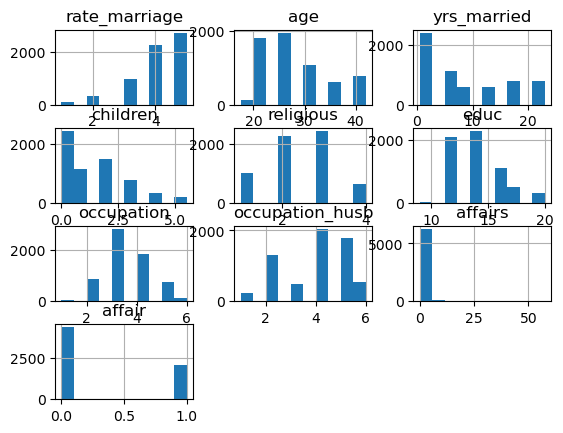

In [9]:
# plot all of the columns
%matplotlib inline
plt.figure(figsize=(20,18))
dta.hist()


In [14]:
print("Split the data into training and test set")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



Split the data into training and test set
(4456, 17)
(4456,)
(1910, 17)
(1910,)


In [15]:
#We will use the statsmodels Logit function for logistic regression
logit = sm.Logit(y_train, X_train)
# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.544479
         Iterations 6


In [16]:
predictions = result.predict(X_test)
predictions


2764    0.653211
4481    0.087718
5360    0.273074
5802    0.249471
1220    0.249630
          ...   
3053    0.144139
1875    0.207506
5851    0.437646
4962    0.190124
1995    0.249630
Length: 1910, dtype: float64

In [17]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)


In [18]:
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4456
Model:                          Logit   Df Residuals:                     4439
Method:                           MLE   Df Model:                           16
Date:                Tue, 22 Aug 2023   Pseudo R-squ.:                  0.1360
Time:                        12:58:02   Log-Likelihood:                -2426.2
converged:                       True   LL-Null:                       -2808.3
Covariance Type:            nonrobust   LLR p-value:                2.844e-152
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.4842      0.777      3.198      0.001       0.961       4.007
occ_2             0.9414      0.658      1.432      0.152      -0.347       2.230
occ_3             1.2324      0.652      1.890      0.059      -0.046       2.511
occ_4             0.9731      0.653      1.490      0.136      -0.307       2.254
occ_5             1.6017      0.657      2.436      0.015       0.313       2.890
occ_6             1.8242      0.707      2.581      0.010       0.439       3.209
occ_husb_2        0.0649      0.215      0.302      0.762      -0.356       0.486
occ_husb_3        0.1976      0.235      0.841      0.400      -0.263       0.658
occ_husb_4        0.0304      0.208      0.146      0.884      -0.377       0.438
occ_husb_5       -0.0052      0.210     -0.025      0.980      -0.417       0.406
occ_husb_6       -0.0183      0.236     -0.078      0.938      -0.481       0.445
rate_marriage    -0.7145      0.038    -18.929      0.000      -0.788      -0.640
age              -0.0577      0.012     -4.686      0.000      -0.082      -0.034
yrs_married       0.1081      0.013      8.243      0.000       0.082       0.134
children         -0.0126      0.038     -0.329      0.742      -0.088       0.062
religious        -0.3889      0.042     -9.342      0.000      -0.470      -0.307
educ              0.0046      0.021      0.224      0.823      -0.036       0.045
=================================================================================
"""

In [19]:
print("Logistic Regression with scikit-learn")
dta.head()


Logistic Regression with scikit-learn


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [20]:
print('Exploratary data analysis')
# people having affair is represented with 1 and not having affair is represented with 0
dta.affair.value_counts()


Exploratary data analysis


0    4313
1    2053
Name: affair, dtype: int64

In [23]:
print("We can conclude that women who have affairs, rate their marriage lower based on our findings from below table")
dta.groupby('affair').mean()


We can conclude that women who have affairs, rate their marriage lower based on our findings from below table


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [24]:
print('Checking rate_marriage paramerter')

dta.groupby('rate_marriage').mean()


Checking rate_marriage paramerter


,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


Lets visualize our data


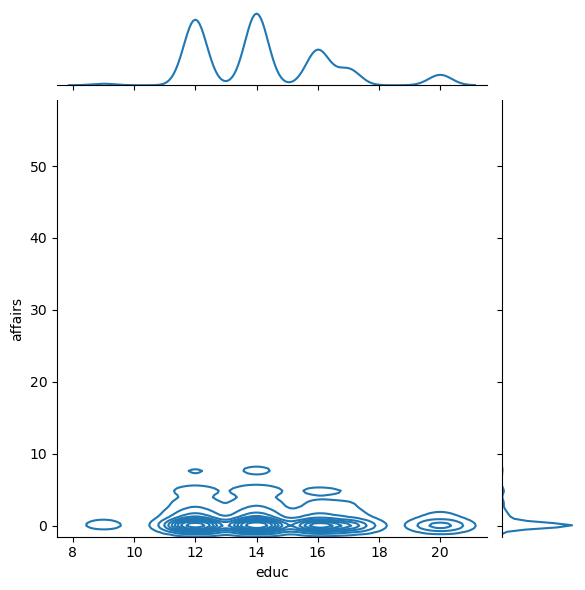

In [25]:
print('Lets visualize our data')
import seaborn as sns
sns.jointplot(x='educ',y='affairs',data=dta,kind='kde')


Text(0, 0.5, 'Frequency')

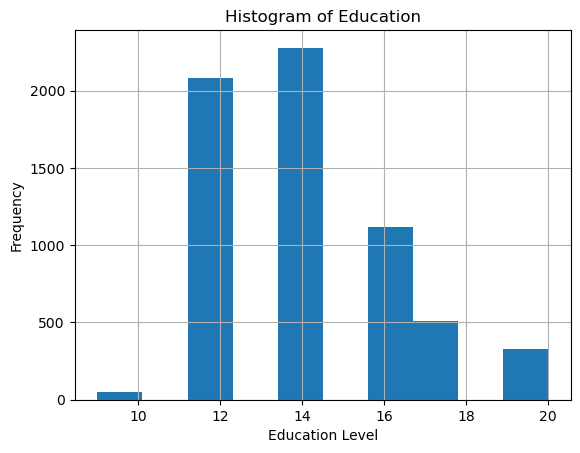

In [26]:
# histogram of education
dta.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

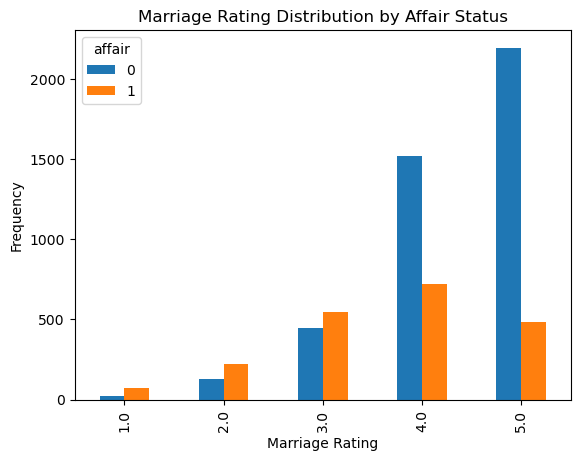

In [27]:
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(dta.rate_marriage, dta.affair).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

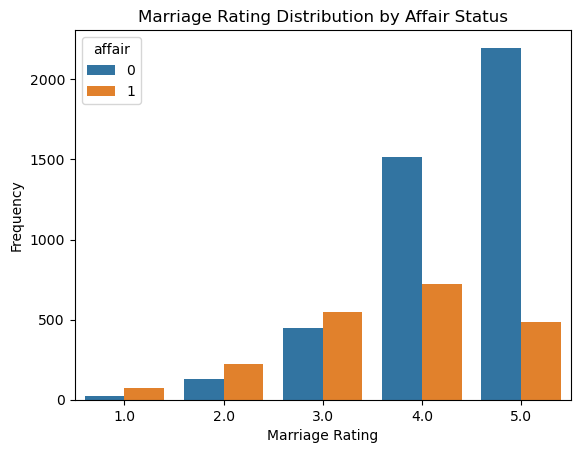

In [28]:
sns.countplot(x='rate_marriage',data=dta,hue='affair')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

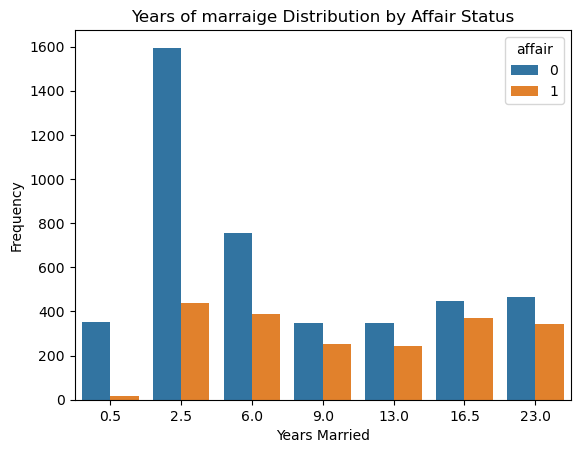

In [29]:
sns.countplot(x='yrs_married',data=dta,hue='affair')
plt.title('Years of marraige Distribution by Affair Status')
plt.xlabel('Years Married')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

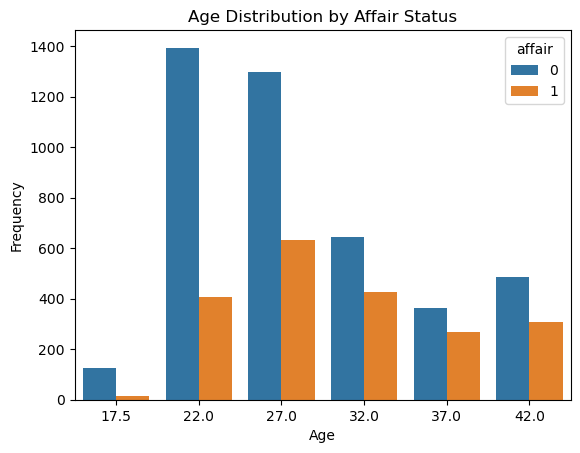

In [30]:
import seaborn as sns
sns.countplot(x='age',data=dta,hue='affair')
plt.title('Age Distribution by Affair Status')
plt.xlabel('Age')
plt.ylabel('Frequency')


In [32]:
print("Model Evaluation Using a Validation Set")
from sklearn.model_selection import train_test_split
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


Model Evaluation Using a Validation Set
(4456, 17)
(4456,)
(1910, 17)
(1910,)


In [33]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [34]:
print(model.score(X_train,y_train))
print("Training set has 73% accuracy")


0.7228456014362658
Training set has 73% accuracy


In [35]:
print("Use the test data set to predict the class / labels")
# predict class labels for the test set
predicted = model.predict(X_test)
predicted


Use the test data set to predict the class / labels


array([1., 0., 0., ..., 0., 0., 0.])

In [36]:
# generate class probabilities
probs = model.predict_proba(X_test)
probs


array([[0.35894583, 0.64105417],
       [0.89907447, 0.10092553],
       [0.71718995, 0.28281005],
       ...,
       [0.53929176, 0.46070824],
       [0.82394699, 0.17605301],
       [0.73672167, 0.26327833]])

In [37]:
print('Evaluating the model')
# generate evaluation metrics
print(metrics.accuracy_score(y_test,predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))
print("The accuracy of the model is 73% similar to the training data.")


Evaluating the model
0.7329842931937173
0.7462186488916087
The accuracy of the model is 73% similar to the training data.


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

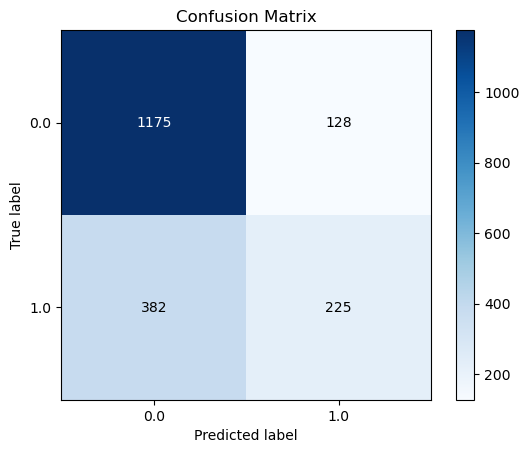

In [38]:
import scikitplot
scikitplot.metrics.plot_confusion_matrix(y_test,predicted)


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

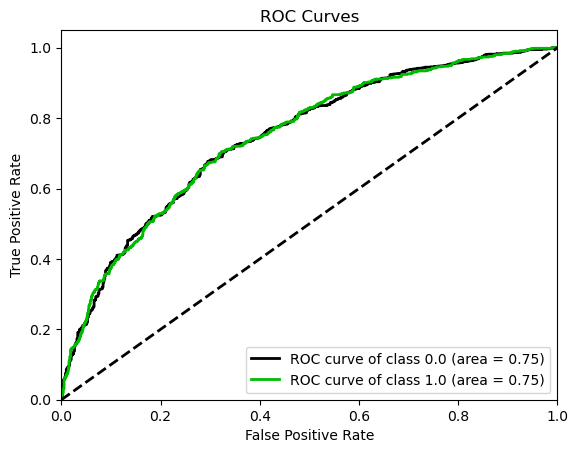

In [39]:
scikitplot.metrics.plot_roc_curve(y_test, probs,curves=['each_class'])


In [40]:
#accuracy report
print(metrics.classification_report(y_test, predicted))


              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82      1303
         1.0       0.64      0.37      0.47       607

    accuracy                           0.73      1910
   macro avg       0.70      0.64      0.65      1910
weighted avg       0.72      0.73      0.71      1910



In [41]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,predicted)
type(cf)


numpy.ndarray

In [42]:
cf.shape


(2, 2)

In [43]:
#Calculation of Precision Recall and F1 score
TN = cf[0,0] #True Negative
FP = cf[0,1] #False Positive
FN = cf[1,0] #False Negative
TP = cf[1,1] #True Positive
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1 = (2 *(Precision * Recall)) / (Precision + Recall)
print("Precision : {} , Recall : {}, F1 : {}".format(Precision,Recall,F1))

Precision : 0.6373937677053825 , Recall : 0.37067545304777594, F1 : 0.46875000000000006


In [44]:
#Calculation of True Positive Rate and False Positive Rate
TPR = (TP) / (TP + FN ) #equal to Recall
FPR = FP / (FP + TN )
print("True Positive Rate : {}, False Positive Rate : {}".format(TPR,FPR))


True Positive Rate : 0.37067545304777594, False Positive Rate : 0.09823484267075978


In [46]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
scores, scores.mean()


(array([0.72056515, 0.69544741, 0.73469388, 0.70800628, 0.71585557,
        0.73155416, 0.72798742, 0.70597484, 0.75157233, 0.75314465]),
 0.724480169426261)

In [47]:
print('Predicting the Probability of an Affair')
print(model.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 25, 3, 1, 4,16]])))
print('The predicted probability of an affair is 23%')

Predicting the Probability of an Affair
[[0.75741812 0.24258188]]
The predicted probability of an affair is 23%


In [48]:
print(model.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 30, 10, 3, 4,16]])))
print('The predicted probability of an affair is 31%')


[[0.67090683 0.32909317]]
The predicted probability of an affair is 31%
